In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.9143 - val_loss: 0.1431 - val_accuracy: 0.9549
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1429 - accuracy: 0.9585 - val_loss: 0.0940 - val_accuracy: 0.9719
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1085 - accuracy: 0.9671 - val_loss: 0.0877 - val_accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0874 - accuracy: 0.9731 - val_loss: 0.0765 - val_accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0749 - accuracy: 0.9766 - val_loss: 0.0762 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0672 - accuracy: 0.9786 - val_loss: 0.0694 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0577 - accuracy: 0.9819 - val_loss: 0.0734 - val_accuracy:

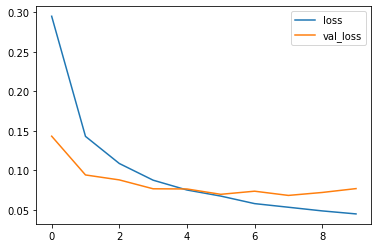

In [6]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

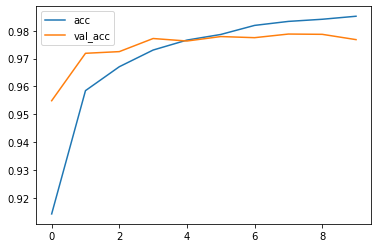

In [7]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9768
[0.0766967386007309, 0.9768000245094299]


In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix


p_test = model.predict(x_test).argmax(axis=1)

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

In [15]:
cm = confusion_matrix(y_test, p_test)
print(cm)

[[ 962    1    5    1    1    1    4    1    3    1]
 [   0 1127    2    1    0    0    1    0    4    0]
 [   1    0 1014    3    1    0    1    5    7    0]
 [   0    0    3  997    0    3    0    3    3    1]
 [   2    0    6    2  928    0    5    5    5   29]
 [   2    0    0    9    1  870    2    1    6    1]
 [   3    4    3    1    1    5  935    0    6    0]
 [   2    6    9    5    0    0    0  995    4    7]
 [   1    0    1    4    2    3    1    2  957    3]
 [   0    3    0    3    4    5    1    4    6  983]]


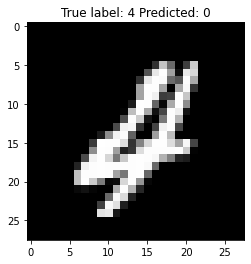

In [17]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));